<a href="https://colab.research.google.com/github/JennEsquivel/EDP1/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de una solución de la ecuación del calor**

Elaboró: Jennifer Esquivel Saldaña

Ejercicio 2.

La solución de la ecuación:

$\frac{\partial u}{\partial \:t}=\frac{\partial ^2u}{\partial x^2}$

sujeta a las condiciones de frontera:

$\frac{\partial u\left(0,t\right)}{\partial x}=0,\:\frac{\partial u\left(1,t\right)}{\partial x}=0,\:t>0$

y la condición inicial:

$u\left(x,0\right)=f(x),\:0<x<1$

Para:

$f(x)= \left\{ \begin{array}{lcc}
             -2 &   si  & 0<x \leq 1/2,\\
             \\ 0 &  si  & 1/2< x < 1
             \end{array}
   \right.$


Está dada en términos de la serie de Fourier por la expresión:

$u\left(x,t\right)= -1-\sum _{n=1}^{\infty }\left[\frac{4}{n\pi }sin\left(\frac{n\pi }{2}\right)\right]cos\left(n\pi x\right)e^{-\left(n\pi \right)^2t}$


Graficamos la condición inicial:

In [ ]:
from pylab import *
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = -2
    return y
def recta_2(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 0
    return y

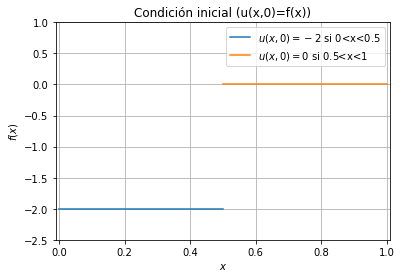

In [ ]:
x= linspace(0,1,1000)
x_1 = linspace(0,0.5,1000)
f_1 = recta_1(x_1)
x_2= linspace(0.5,1,1000)
f_2 = recta_2(x_2)
plot(x_1,f_1,label='$u(x,0)=-2 $ si 0<x<0.5')
plot(x_2,f_2,label='$u(x,0)=0 $ si 0.5<x<1')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-2.5,1]),grid(),legend()
show()

Aproximamos la condición inicial $u\left(x,0\right)=f(x)$ con ayuda de la serie de Fourier.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += [(4/(n*pi))*  sin((n*pi)/(2) ) ] *cos(n*pi*x)
    return (-1-f)

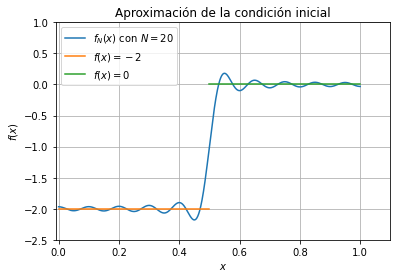

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x_1,f_1,label='$f(x)=-2$')
plot(x_2,f_2,label='$f(x)=0$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.5,1]),grid(),legend()
show()

Se pueden unar n cantidad de armónicos para visualizar la aproximación.

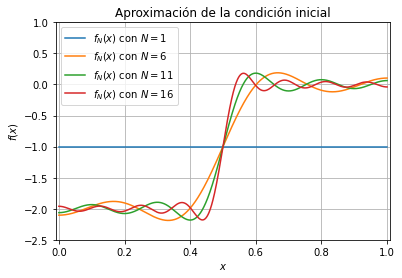

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,1]),grid(),legend()
show()

Para poder graficar la solución completa, usamos el momento inicial $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += [(4/(n*pi))*  sin((n*pi)/(2) ) ] *cos(n*pi*x)*exp(-n**2*pi**2*t[i])
    return (-1-f)

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

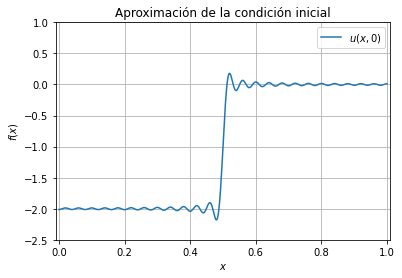

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,1]),grid(),legend()
show()

Ahora, cuando $t\to∞$, la solución va evolucionando.

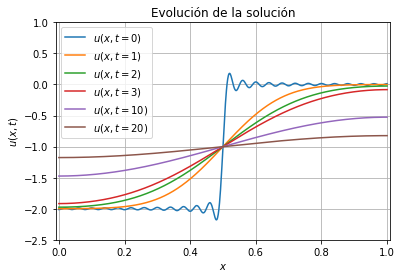

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.5,1]),grid(),legend()
show()

Podemos graficar lo anterior en 3D:

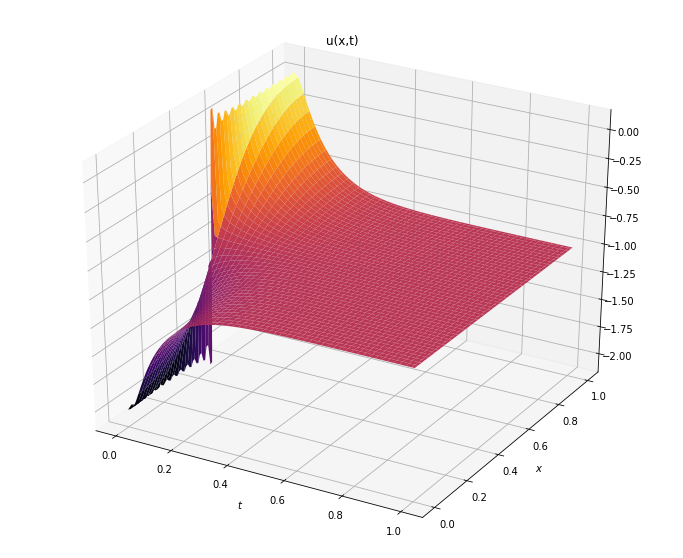

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"v